In [1]:
    import pandas as pd
    import numpy as np

    import matplotlib.pyplot as plt
    %matplotlib inline

    import seaborn as sns
    sns.set_style(style='darkgrid')

    import plotly.express as px

    from sklearn.model_selection import train_test_split as tts

    from sklearn import tree
    from sklearn import metrics as mtr


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from yellowbrick.classifier import ROCAUC

In [5]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.4f}'.format        

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [42]:
df = pd.read_csv('wineQuality.csv',sep=';') 

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
1,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
2,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
3,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
4,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5


In [43]:
df.rename(columns={'fixed acidity':'fixAcidity','volatile acidity':'volAcidity','citric acid':'citricAcid',
                   'residual sugar':'resSugar','free sulfur dioxide':'freeSo2','total sulfur dioxide':'totSo2'},inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixAcidity    1599 non-null float64
volAcidity    1599 non-null float64
citricAcid    1599 non-null float64
resSugar      1599 non-null float64
chlorides     1599 non-null float64
freeSo2       1599 non-null float64
totSo2        1599 non-null float64
density       1599 non-null float64
pH            1599 non-null float64
sulphates     1599 non-null float64
alcohol       1599 non-null float64
quality       1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df[df==0].count()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,"1,599.0000",8.3196,1.7411,4.6000,7.1000,7.9000,9.2000,15.9000
volatile acidity,"1,599.0000",0.5278,0.1791,0.1200,0.3900,0.5200,0.6400,1.5800
citric acid,"1,599.0000",0.2710,0.1948,0.0000,0.0900,0.2600,0.4200,1.0000
residual sugar,"1,599.0000",2.5388,1.4099,0.9000,1.9000,2.2000,2.6000,15.5000
chlorides,"1,599.0000",0.0875,0.0471,0.0120,0.0700,0.0790,0.0900,0.6110
free sulfur dioxide,"1,599.0000",15.8749,10.4602,1.0000,7.0000,14.0000,21.0000,72.0000
total sulfur dioxide,"1,599.0000",46.4678,32.8953,6.0000,22.0000,38.0000,62.0000,289.0000
density,"1,599.0000",0.9967,0.0019,0.9901,0.9956,0.9968,0.9978,1.0037
pH,"1,599.0000",3.3111,0.1544,2.7400,3.2100,3.3100,3.4000,4.0100
sulphates,"1,599.0000",0.6581,0.1695,0.3300,0.5500,0.6200,0.7300,2.0000


In [12]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [44]:
#Map to 3 Quality levels
mapping = {3:'Good',4:'Good',5:'Good', 6:'Better', 7:'Best', 8:'Best'}

df['quality'] = df['quality'].replace(mapping)
df['quality'].value_counts()

Good      744
Better    638
Best      217
Name: quality, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD6A7164A8>,
      dtype=object)

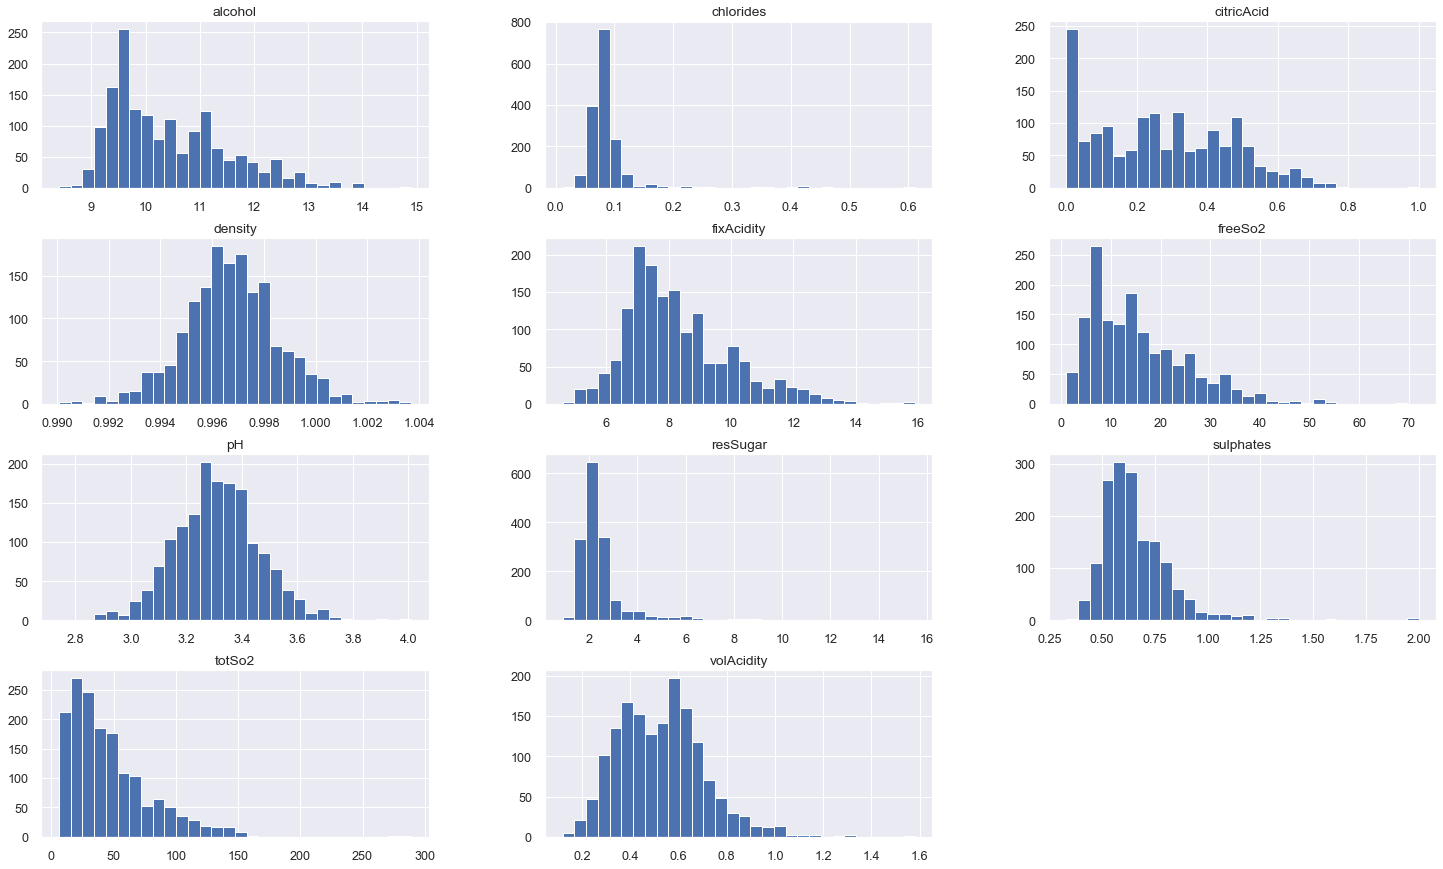

In [45]:
df.hist(bins=30, figsize=[25,15])

In [46]:
fig = px.histogram(df, x='chlorides', marginal='box')
fig.show()

In [47]:
fig = px.histogram(df, x='resSugar', marginal='box')
fig.show()

<Figure size 2160x1440 with 0 Axes>

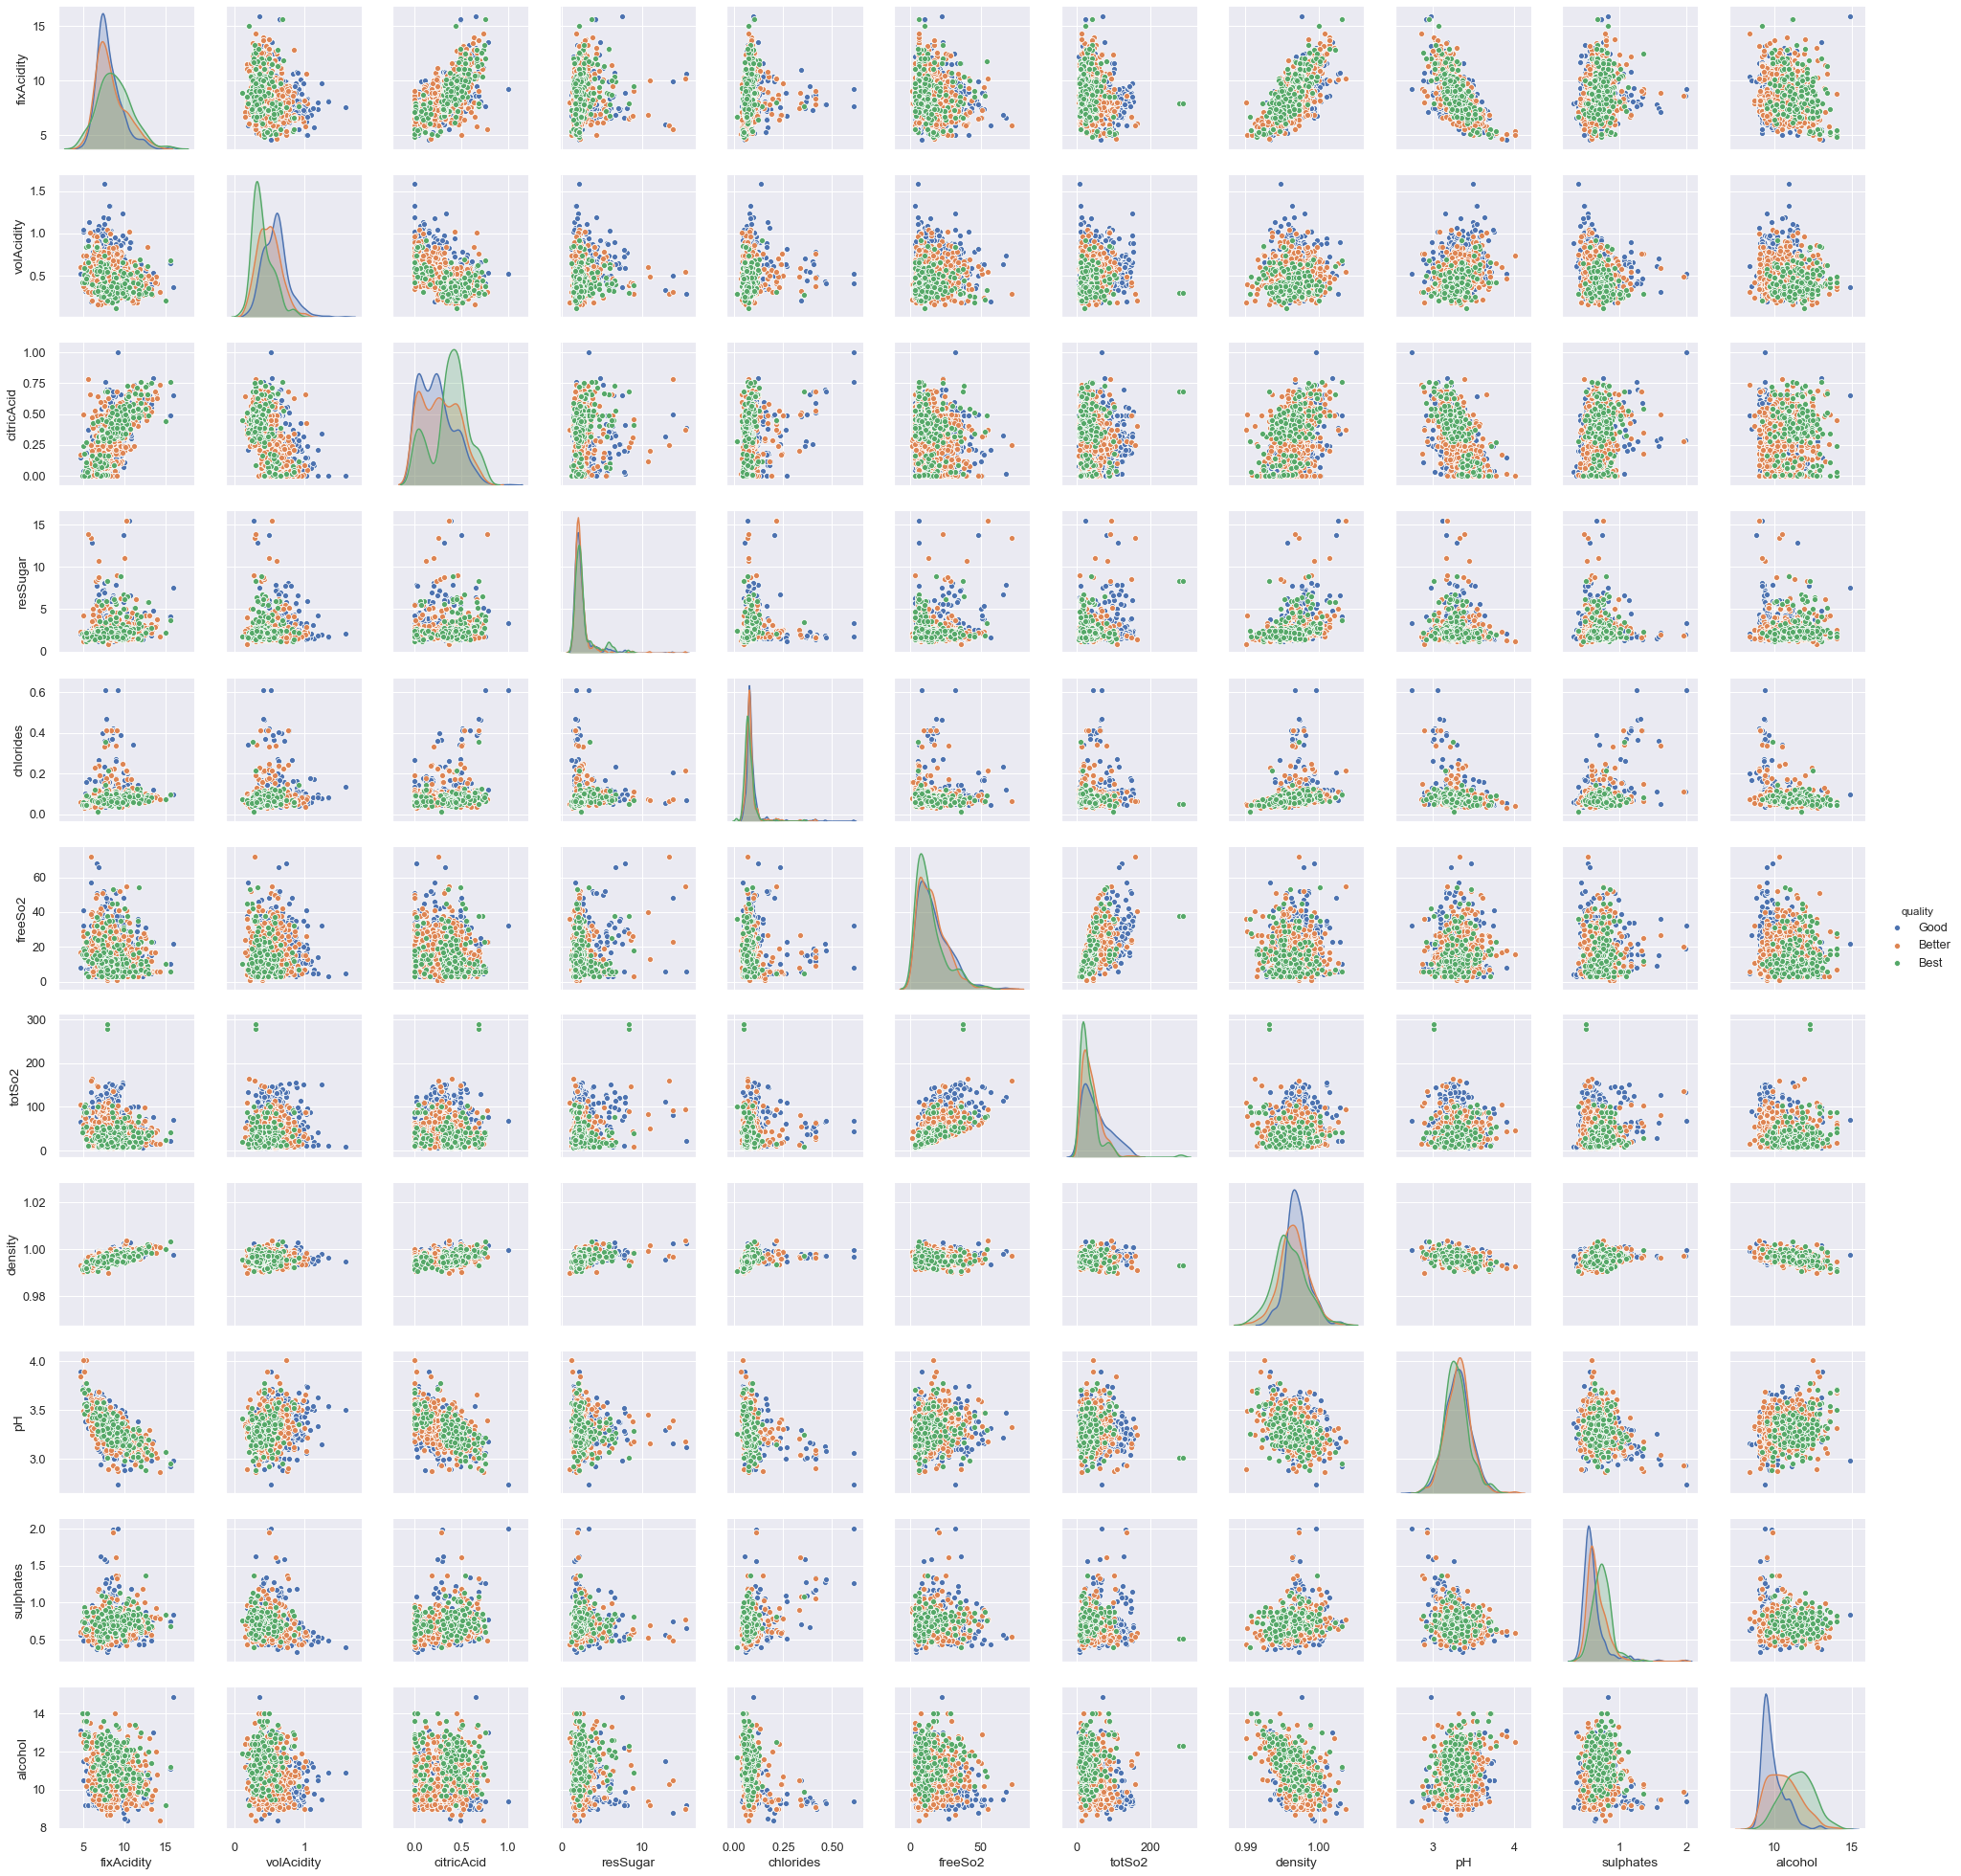

In [48]:
plt.figure(figsize=[30,20])
sns.set(font_scale=1.15)
sns.pairplot(df, hue='quality')
plt.show()

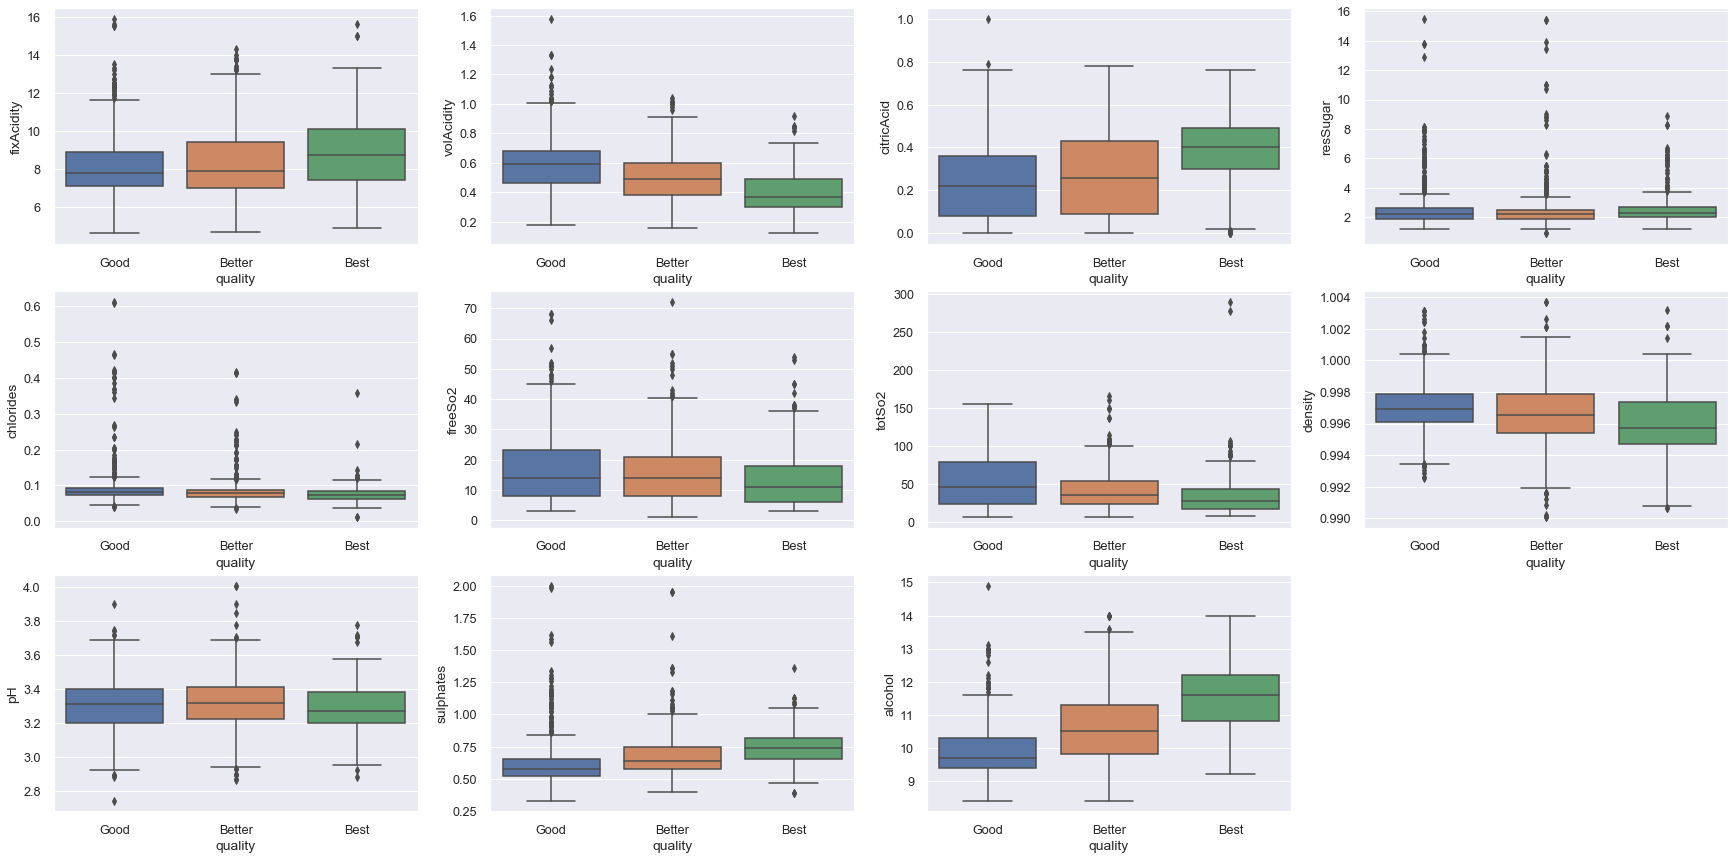

In [49]:
palette1=plt.get_cmap('tab20b')
palette2=plt.get_cmap('tab20c')
num=0
plt.figure(figsize=[30,20])
for col in df.drop('quality',axis=1) :
    num += 1
    plt.subplot(4,4,num)
    sns.boxplot(df.quality, df[col])
#     plt.xlim(2,10)
#     plt.ylim(0,100)


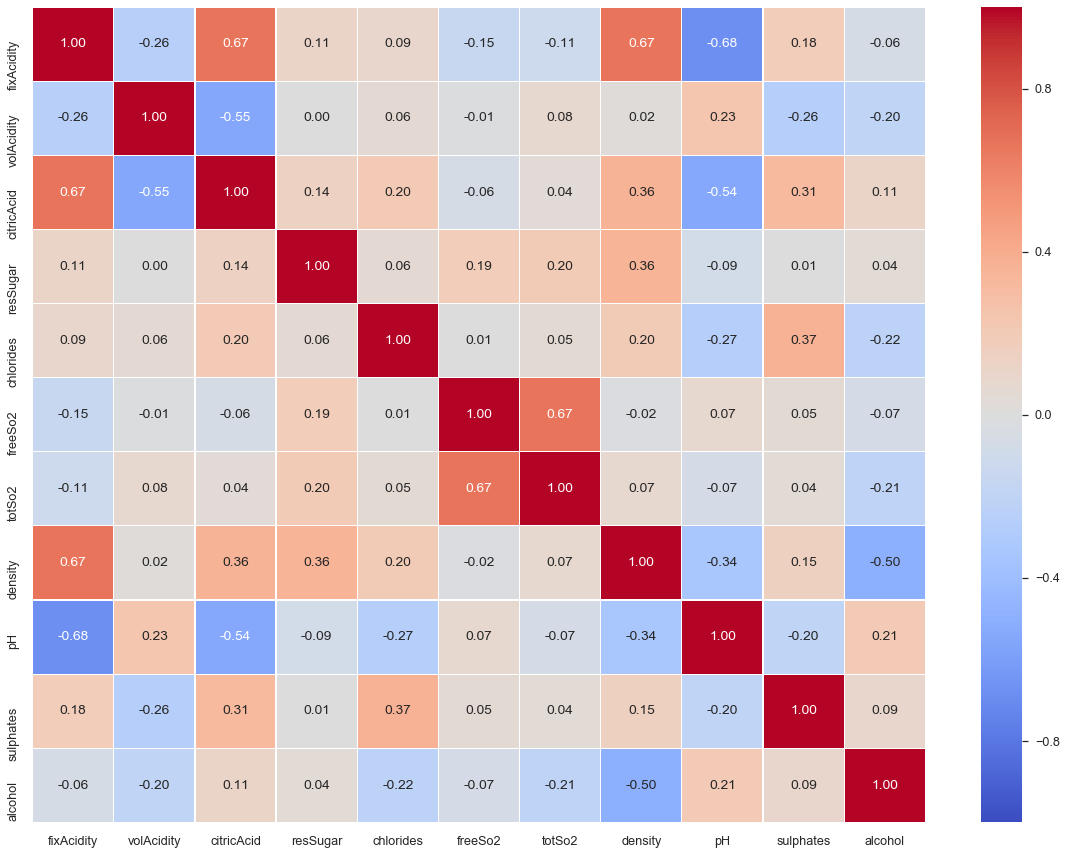

In [38]:
corr = df.drop('quality',axis=1).corr()
plt.figure(figsize=[20,15])
sns.set(font_scale=1.15)
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,center=0, linewidth=0.2, fmt='.2f', cmap='coolwarm')
plt.show()

In [72]:
dfy = df.quality
dfX = df.drop('quality',axis=1)

dfX_tr,dfX_ts, dfy_tr, dfy_ts = tts(dfX,dfy,test_size=0.3, random_state=60)


In [73]:
dfy_tr.value_counts(normalize=True)*100

Good     47.1850
Better   40.2145
Best     12.6005
Name: quality, dtype: float64

In [74]:
dfy_ts.value_counts(normalize=True)*100

Good     45.0000
Better   39.1667
Best     15.8333
Name: quality, dtype: float64

## 1)DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [96]:
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[35,40,50,60]
}

grid = GridSearchCV(dtc(splitter='best'),param_grid,refit=True, verbose=True, n_jobs=-1, scoring='f1_weighted')
gfit = grid.fit(dfX_tr,dfy_tr)

# print best parameter after tuning 
print("Scorer used : ", gfit.scorer_)
print("Best score: %0.3f" % gfit.best_score_)
print('Best Params : ',grid.best_params_) 

# print classification report 
grid_predictions = grid.predict(dfX_ts) 
print(mtr.classification_report(dfy_ts, grid_predictions)) 



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Scorer used :  make_scorer(f1_score, pos_label=None, average=weighted)
Best score: 0.643
Best Params :  {'criterion': 'entropy', 'max_depth': 50}
              precision    recall  f1-score   support

        Best       0.54      0.47      0.50        76
      Better       0.59      0.60      0.59       188
        Good       0.72      0.74      0.73       216

    accuracy                           0.64       480
   macro avg       0.62      0.60      0.61       480
weighted avg       0.64      0.64      0.64       480


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [141]:
dtree = dtc(criterion='entropy',splitter='best',max_depth=40)

dtree.fit(dfX_tr, dfy_tr)
print('Training Score : ',dtree.score(dfX_tr, dfy_tr))
print('Training Score : ',dtree.score(dfX_ts, dfy_ts))

Training Score :  1.0
Training Score :  0.64375


0.7360449915341025

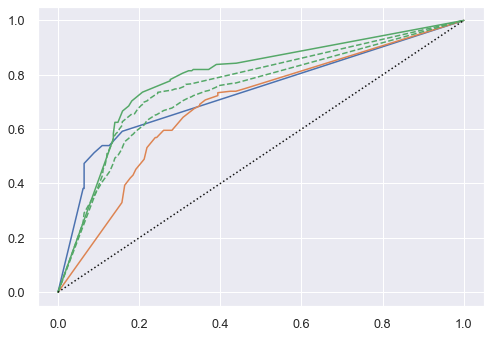

In [146]:
roc = ROCAUC(dtc(criterion='entropy',splitter='best',max_depth=10))
roc.fit(dfX_tr, dfy_tr)
roc.score(dfX_ts, dfy_ts)
# roc